<a href="https://colab.research.google.com/github/Partha-SUST16/Time_Series_Analysis/blob/main/Using_Cloud_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
sns.set()
plt.rcParams['agg.path.chunksize'] = 10000
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller 
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
cloud = pd.read_csv('/content/drive/My Drive/Cloud Resource /machine_usage (1).csv',index_col=['time_stamp'],parse_dates=['time_stamp'])
cloud.sort_values('time_stamp')
copyCloud = cloud.loc[cloud.machine_id=='m_1932']

In [42]:
cloud.shape
cloud.head()

,machine_id,cpu_util_percent,mem_util_percent,mem_gps,mkpi,net_in,net_out,disk_io_percent
time_stamp,,,,,,,,
386640,m_1932,41,92,NaN,NaN,43.04,33.08,5
386670,m_1932,43,92,NaN,NaN,43.04,33.08,5
386690,m_1932,44,92,NaN,NaN,43.05,33.08,5
386800,m_1932,46,92,NaN,NaN,43.05,33.08,3
386930,m_1932,44,93,NaN,NaN,43.05,33.09,4


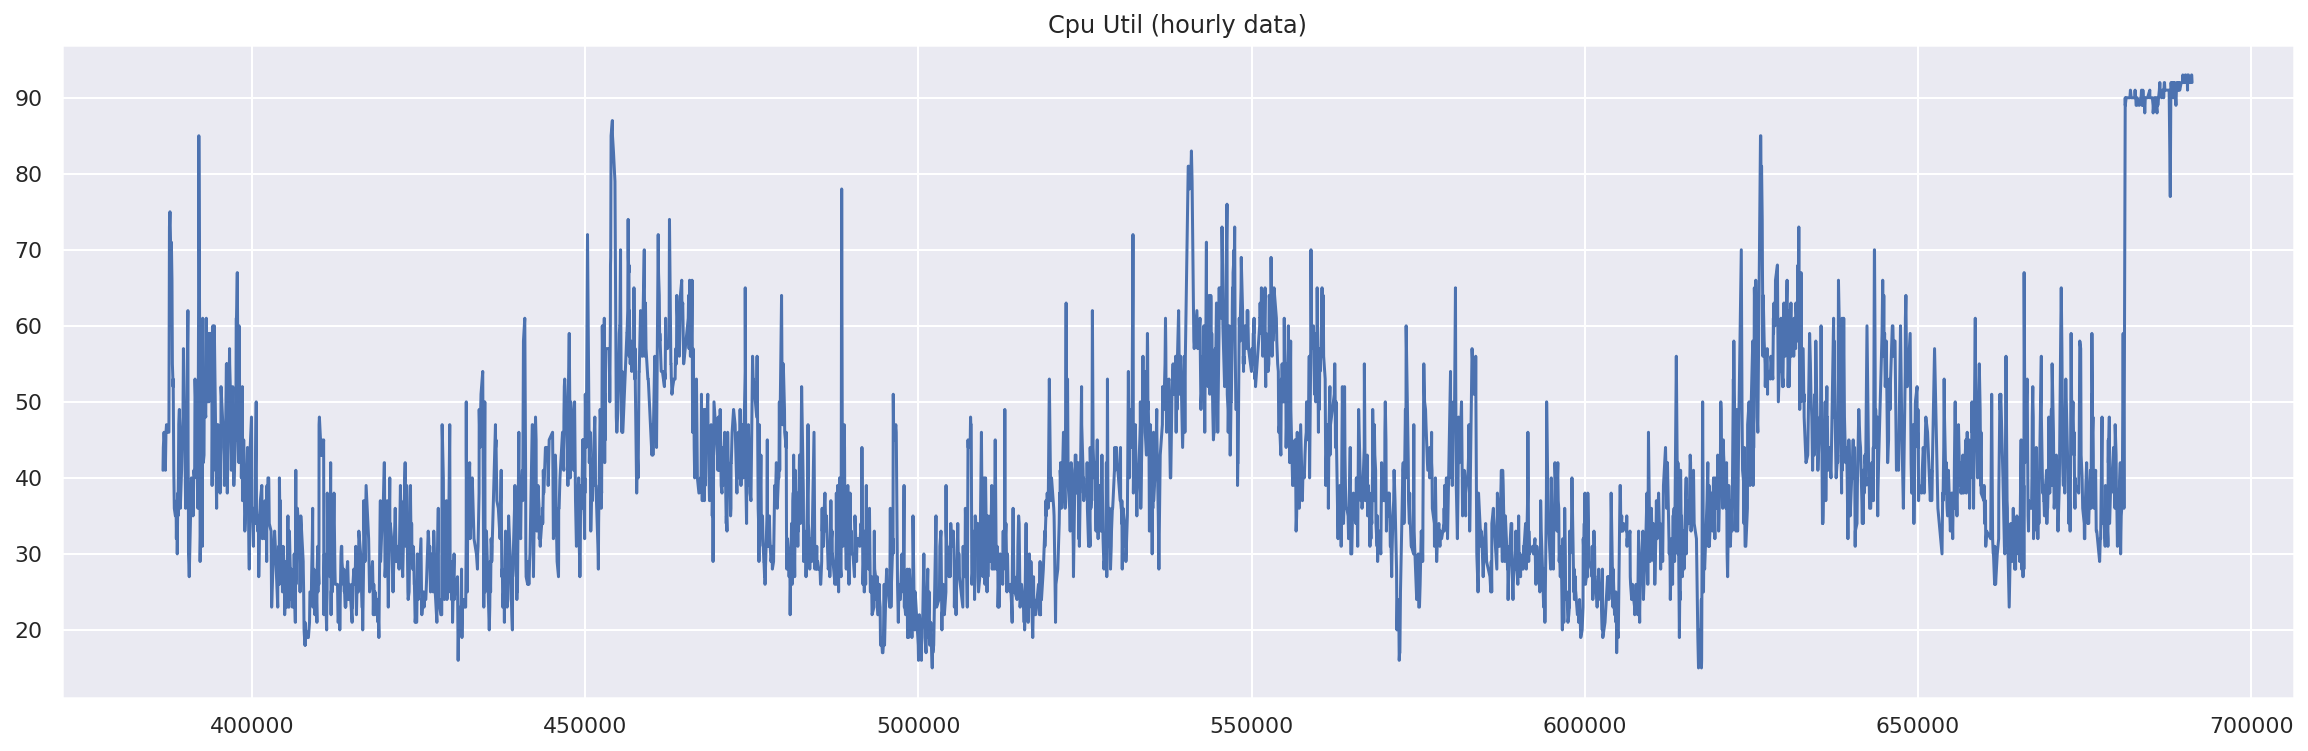

In [44]:
plt.figure(figsize=(20, 6))
#plt.plot(cloud.head(50000)['cpu_util_percent'])
plt.plot(copyCloud.cpu_util_percent)
plt.title('Cpu Util (hourly data)')
plt.grid(True)
plt.show()

In [47]:
fullterTest = adfuller(copyCloud.cpu_util_percent)
fullterTest

(-2.9072339518217145,
 0.04451323100534518,
 17,
 3307,
 {'1%': -3.432328948643146,
  '10%': -2.567235451893058,
  '5%': -2.862414382816965},
 21513.632320165612)

In [48]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

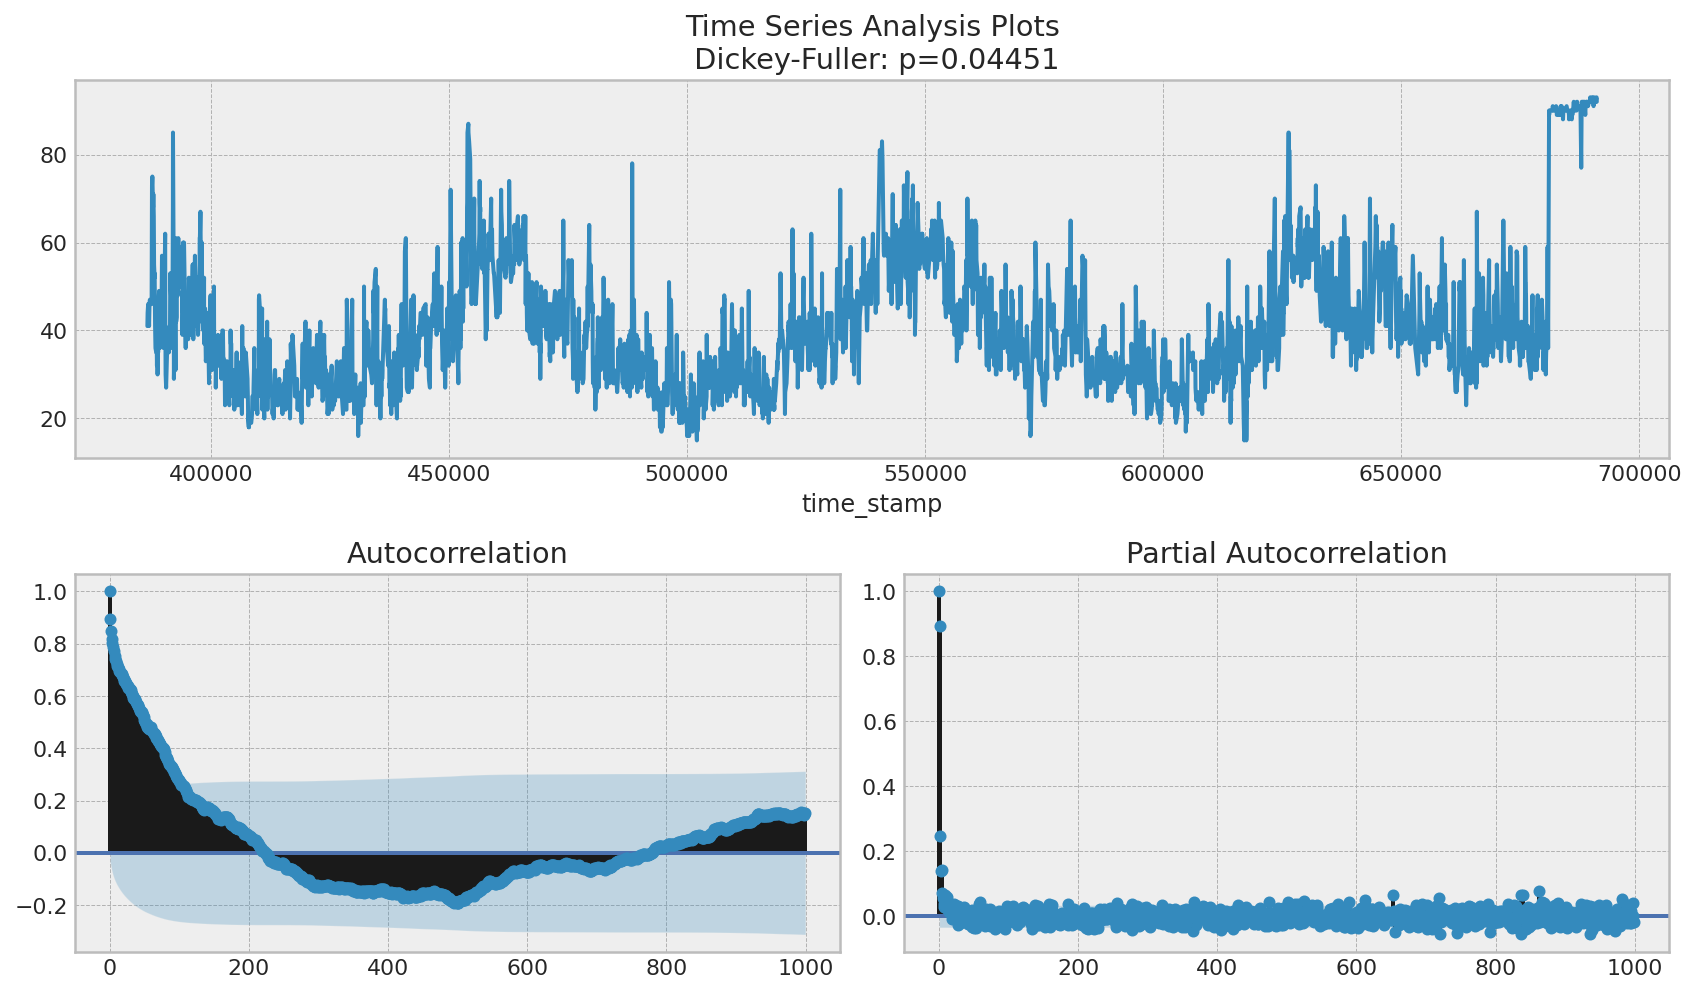

In [51]:
tsplot(copyCloud.cpu_util_percent,lags=999)

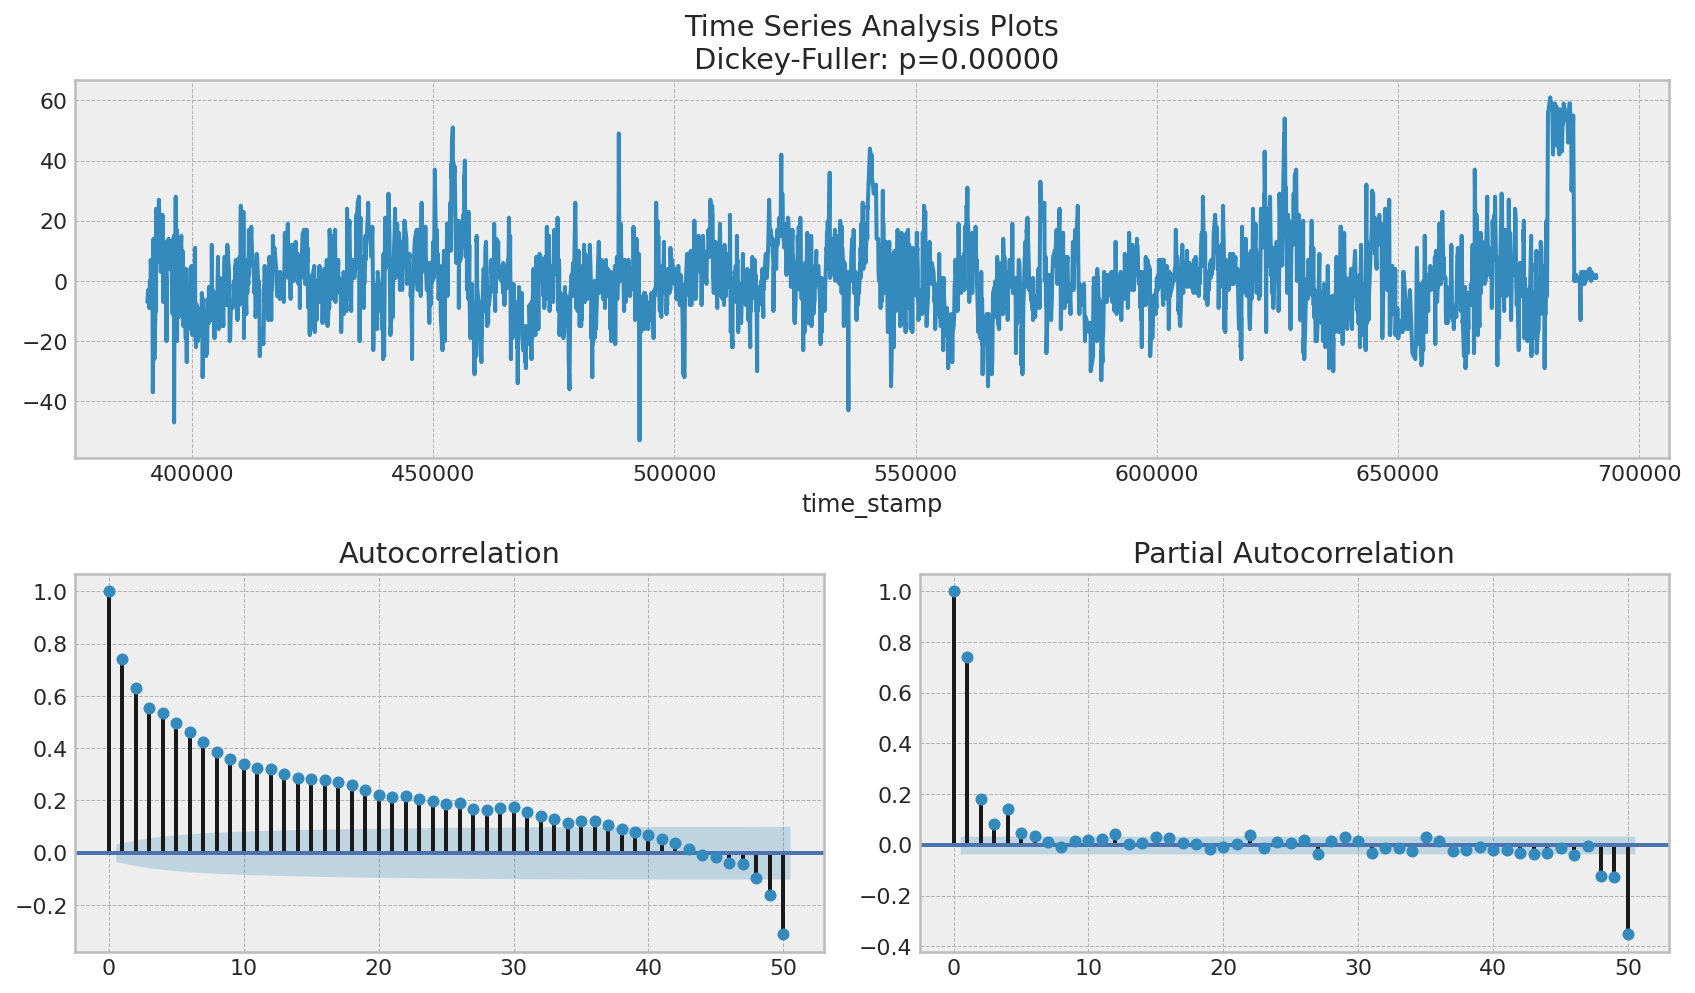

In [57]:
shiftCloud = copyCloud.cpu_util_percent - copyCloud.cpu_util_percent.shift(50)
shiftCloud
tsplot(shiftCloud[50:],lags=50)